In [1]:
## loading packages
suppressPackageStartupMessages({
  library(ChIPseeker)
  library(TxDb.Dmelanogaster.UCSC.dm6.ensGene)
  library(clusterProfiler)
})
# Set database for genome annotation
txdb <- TxDb.Dmelanogaster.UCSC.dm6.ensGene

In [3]:
# Load contrasted peaks from MACS2
bed_file <- "/scratch/peidli/DECODE_cph/macs2/contrast_summits.bed"
peak <- readPeakFile(bed_file)
seqlevelsStyle(peak) <- "UCSC"  # e.g. "chr2R" -> "2R"

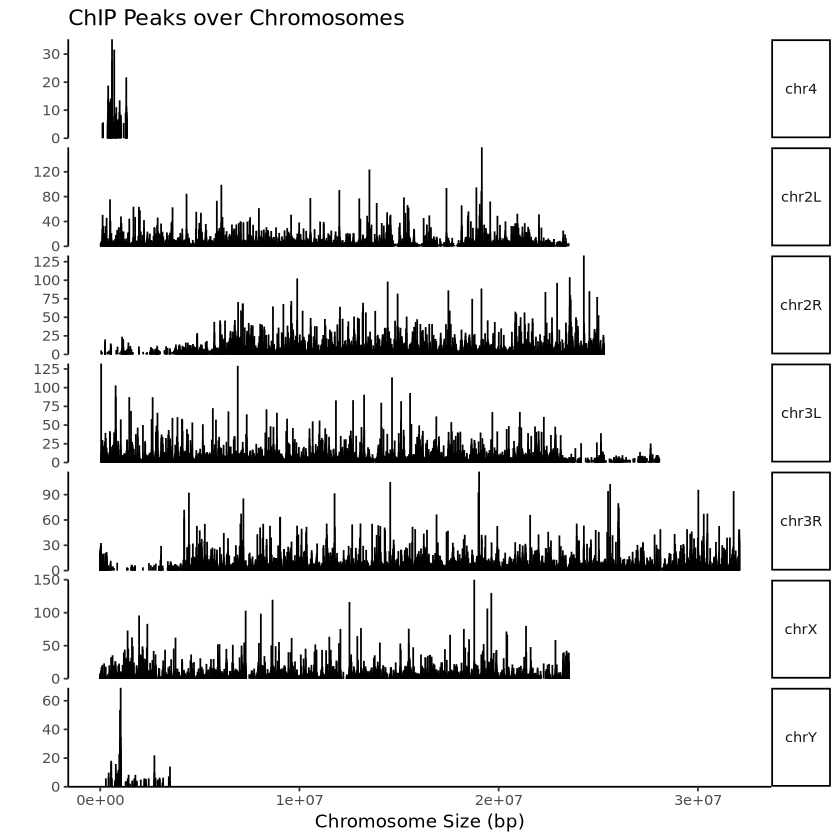

In [4]:
# Coverage over genome (takes around 2mins)
covplot(peak, weightCol="V5")

In [8]:
# Define TSS regions (takes ca 30sec)
promoter <- getPromoters(TxDb=txdb, upstream=3000, downstream=3000)
tagMatrix <- getTagMatrix(peak, windows=promoter)

>> preparing start_site regions by gene... 2024-06-10 14:46:22
>> preparing tag matrix...  2024-06-10 14:46:22 


>> plotting figure...			 2024-06-07 15:38:59 


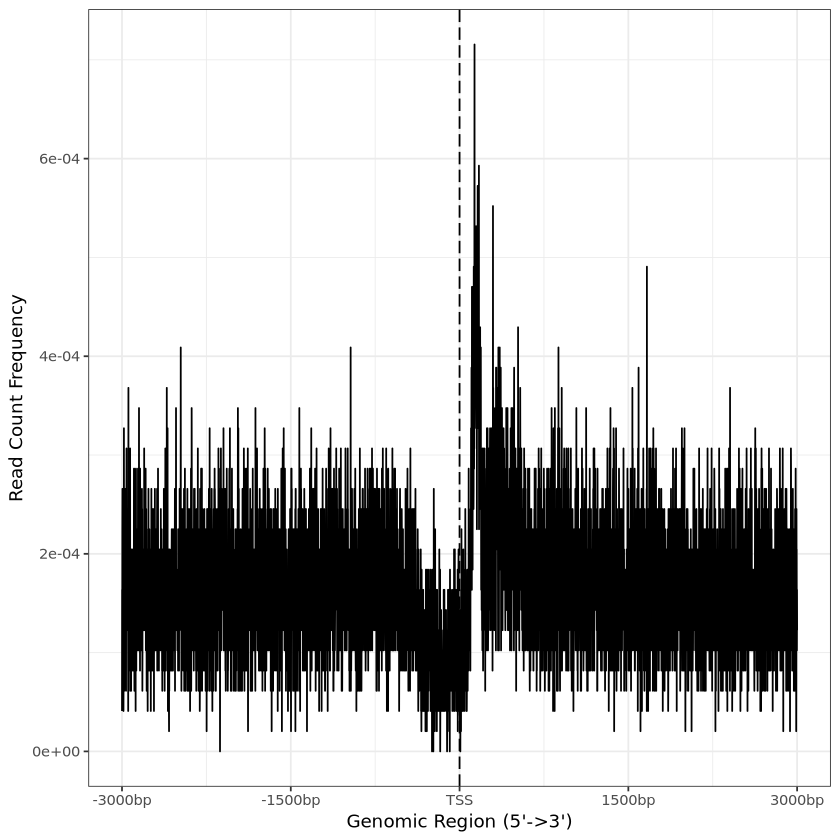

In [61]:
# Average Profile of ChIP peaks binding to TSS region
plotAvgProf(tagMatrix, xlim=c(-3000, 3000),
            xlab="Genomic Region (5'->3')",
            ylab = "Read Count Frequency")

In [55]:
# Peak annotation
peakAnno <- annotatePeak(peak, 
    tssRegion=c(-3000, 3000),
    TxDb=txdb)

>> preparing features information...		 2024-06-07 15:37:54 
>> identifying nearest features...		 2024-06-07 15:37:54 
>> calculating distance from peak to TSS...	 2024-06-07 15:37:56 
>> assigning genomic annotation...		 2024-06-07 15:37:56 
>> assigning chromosome lengths			 2024-06-07 15:37:57 
>> done...					 2024-06-07 15:37:57 


In [56]:
peakAnno.df <- as.data.frame(peakAnno)
# write to csv
write.csv(peakAnno.df, file = "../results/peakAnno.csv")

In [58]:
head(peakAnno.df)

,seqnames,start,end,width,strand,V4,V5,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
1,chr2L,27340,27340,1,*,contrast_peak_1,5.00735,Promoter (2-3kb),1,21823,25155,3333,2,FBgn0031209,FBtr0113008,-2185
2,chr2L,30573,30573,1,*,contrast_peak_2,3.81644,"Exon (FBtr0078164/FBgn0051973, exon 8 of 14)",1,21823,25155,3333,2,FBgn0031209,FBtr0113008,-5418
3,chr2L,31642,31642,1,*,contrast_peak_3,4.60870,"Exon (FBtr0078164/FBgn0051973, exon 8 of 14)",1,21823,25155,3333,2,FBgn0031209,FBtr0113008,-6487
4,chr2L,36135,36135,1,*,contrast_peak_4,5.64286,"Exon (FBtr0309225/FBgn0051973, exon 5 of 11)",1,21823,25155,3333,2,FBgn0031209,FBtr0113008,-10980
5,chr2L,39653,39653,1,*,contrast_peak_5,3.82071,"Exon (FBtr0078163/FBgn0051973, exon 3 of 13)",1,21823,25155,3333,2,FBgn0031209,FBtr0113008,-14498
6,chr2L,48406,48406,1,*,contrast_peak_6,2.88393,"Intron (FBtr0078163/FBgn0051973, intron 2 of 12)",1,54817,55767,951,1,FBgn0267987,FBtr0347585,-6411


In [66]:
peakAnno.df[peakAnno.df$geneId == "FBgn0029939",]

,seqnames,start,end,width,strand,V4,V5,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
35664,chrX,7193925,7193925,1,*,contrast_peak_35664,3.45616,Promoter (2-3kb),6,7196029,7241932,45904,1,FBgn0029939,FBtr0309030,-2104
35665,chrX,7194954,7194954,1,*,contrast_peak_35665,15.41056,Promoter (1-2kb),6,7196029,7241932,45904,1,FBgn0029939,FBtr0309030,-1075
35666,chrX,7195955,7195955,1,*,contrast_peak_35666,23.11898,Promoter (<=1kb),6,7196029,7241932,45904,1,FBgn0029939,FBtr0309030,-74
35667,chrX,7200504,7200504,1,*,contrast_peak_35667,2.49622,"Intron (FBtr0339815/FBgn0029939, intron 2 of 4)",6,7196029,7241932,45904,1,FBgn0029939,FBtr0309030,4475
35668,chrX,7204912,7204912,1,*,contrast_peak_35668,11.48291,"Intron (FBtr0339815/FBgn0029939, intron 2 of 4)",6,7196029,7241932,45904,1,FBgn0029939,FBtr0309030,8883
35669,chrX,7207929,7207929,1,*,contrast_peak_35669,3.45616,"Intron (FBtr0339815/FBgn0029939, intron 2 of 4)",6,7196029,7241932,45904,1,FBgn0029939,FBtr0309030,11900
35670,chrX,7226407,7226407,1,*,contrast_peak_35670,3.82071,Promoter (<=1kb),6,7226455,7241538,15084,1,FBgn0029939,FBtr0474234,-48
35671,chrX,7228353,7228353,1,*,contrast_peak_35671,54.76183,Promoter (1-2kb),6,7226455,7241538,15084,1,FBgn0029939,FBtr0474235,1898
35672,chrX,7229520,7229520,1,*,contrast_peak_35672,7.78767,"Intron (FBtr0339815/FBgn0029939, intron 2 of 4)",6,7226455,7241538,15084,1,FBgn0029939,FBtr0474235,3065


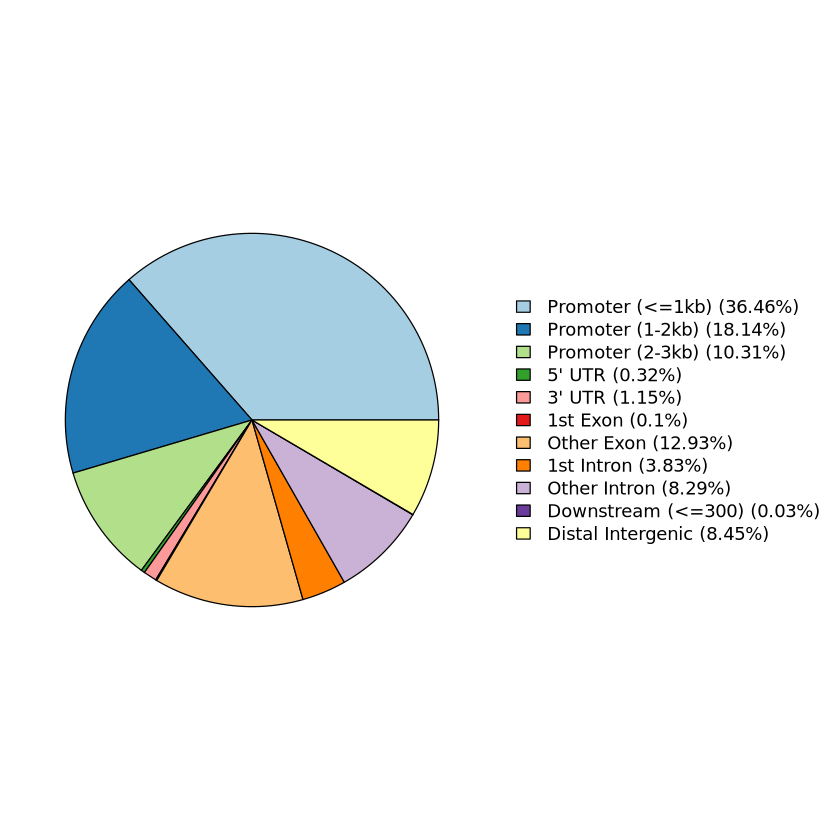

In [62]:
plotAnnoPie(peakAnno)


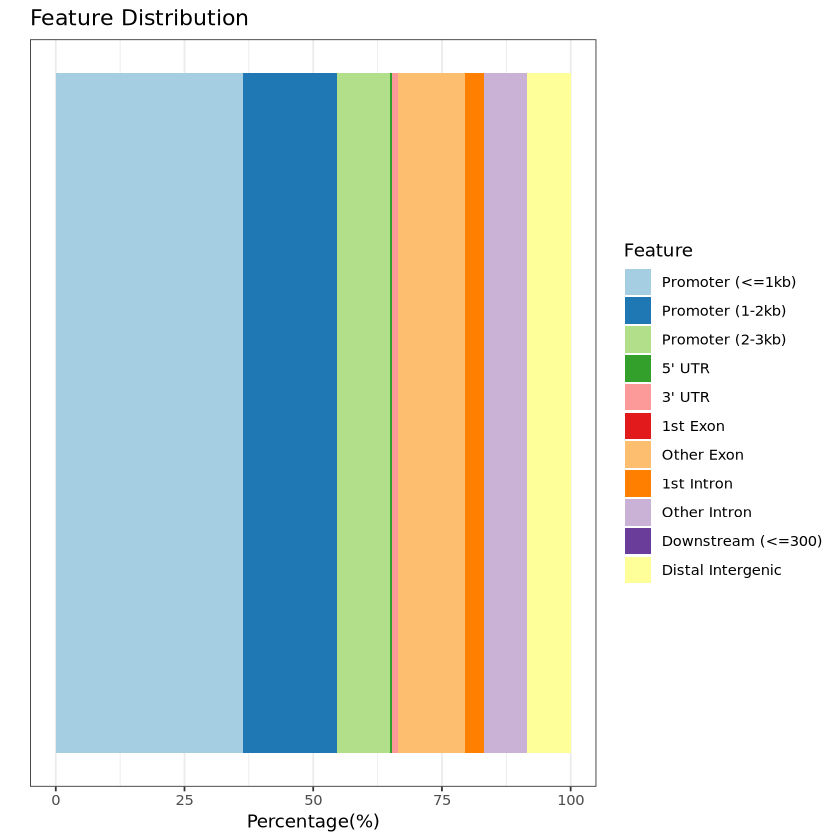

In [63]:
plotAnnoBar(peakAnno)


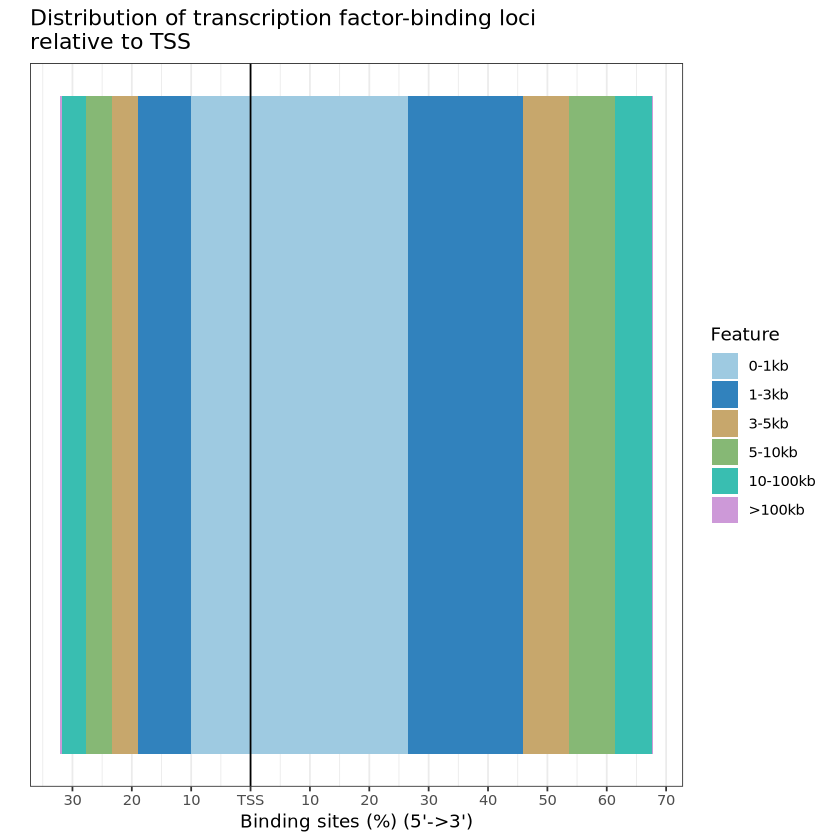

In [64]:
# The distance from the peak (binding site) to the TSS of the nearest gene is calculated by annotatePeak and reported in the output. 
# We provide plotDistToTSS to calculate the percentage of binding sites upstream and downstream from the TSS of the nearest genes, and visualize the distribution.
plotDistToTSS(peakAnno,
              title="Distribution of transcription factor-binding loci\nrelative to TSS")